In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('data/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
categorical_columns = data.select_dtypes('object').columns
numerical_columns = data.select_dtypes('number').columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the above output we can see that we don't have any explicit null value. But some of the Columns are non numeric

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Let's check for any data imbalance
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Our data is not balanced but the difference b/w the negative and the positive class is not too large.

## Exploratory Data Analysis

Let's explore the data a bit more to gain better understanding of the relationship b/w the dependent and independent variables.

### Using the Categorical Features

In [7]:
data[categorical_columns].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

The Number of Possible Values for each our categorical features.

In [8]:
data[categorical_columns].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


<AxesSubplot:>

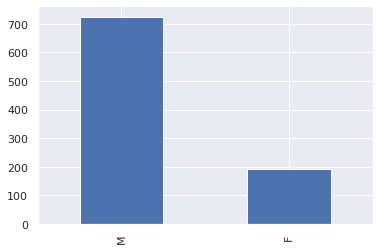

In [9]:
data['Sex'].value_counts().plot(kind='bar')

In [10]:
data.pivot_table('HeartDisease', index='Sex')

,HeartDisease
Sex,
F,0.259067
M,0.631724


Average of People with Heart Disease based on their Gender. we can see that most of the males on our datasets have Heart Disease.

In [11]:
age_range = pd.cut(data['Age'], 5)
data.groupby(age_range)['HeartDisease'].mean()

Age
(27.951, 37.8]    0.265306
(37.8, 47.6]      0.378947
(47.6, 57.4]      0.535817
(57.4, 67.2]      0.717391
(67.2, 77.0]      0.703704
Name: HeartDisease, dtype: float64

In [12]:
np.round(data.pivot_table('HeartDisease', index='Sex', columns=age_range) * 100, 2)

Age,"(27.951, 37.8]","(37.8, 47.6]","(47.6, 57.4]","(57.4, 67.2]","(67.2, 77.0]"
Sex,,,,,
F,7.69,13.95,22.08,48.08,12.50
M,33.33,44.90,62.50,77.23,80.43


As seen from the above table that females from 57-67 years has high average of Heart Disease while Males from 47 to above mostly have High Disease.

In [13]:
data.groupby('ChestPainType')['HeartDisease'].sum()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [14]:
data.groupby('ChestPainType')['HeartDisease'].mean()

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='ChestPainType'>

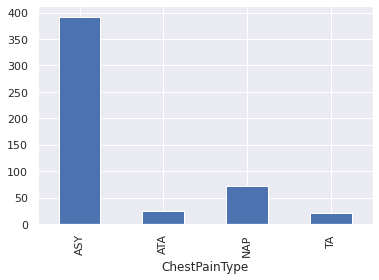

In [15]:
data.groupby('ChestPainType')['HeartDisease'].sum().plot(kind='bar')

We can see that people with ASY ChestPaintType are more likely to have Heart Disease that others. Let's check and see if this holds True based on individual Sex.

In [16]:
data.pivot_table('HeartDisease', index='Sex', columns='ChestPainType', aggfunc='sum')

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,39,4,6,1
M,353,20,66,19


Interesting! No matter what the Gender is, People With ASY ChestPaintType are more likely to have Heart Disease.

In [17]:
data.groupby('RestingECG')['HeartDisease'].mean()

RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64

The RestingECG Seems to balance for both *LHV* and *Normal* expect for *ST* which has about 65% Individuals having HeartDisease.

In [18]:
data.groupby('ExerciseAngina')['HeartDisease'].mean()

ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64

Again 85% of People with *ExerciseAngina* have *HeartDisease*

In [19]:
data.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina')

ExerciseAngina,N,Y
Sex,,
F,0.153333,0.627907
M,0.425693,0.881098


In [20]:
(data.groupby('ST_Slope')['HeartDisease'].mean() * 100).round(2)

ST_Slope
Down    77.78
Flat    82.83
Up      19.75
Name: HeartDisease, dtype: float64

People with Up *ST_Slope* have lower rate of HeartDisease that others.

### Using the Numerical Features

In [21]:
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

<AxesSubplot:>

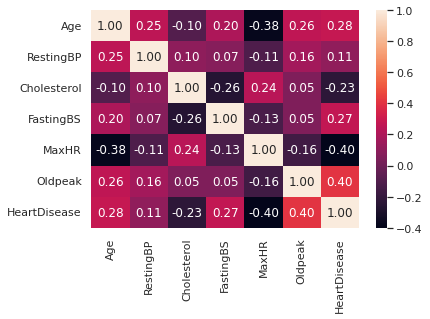

In [22]:
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, fmt='.2f')

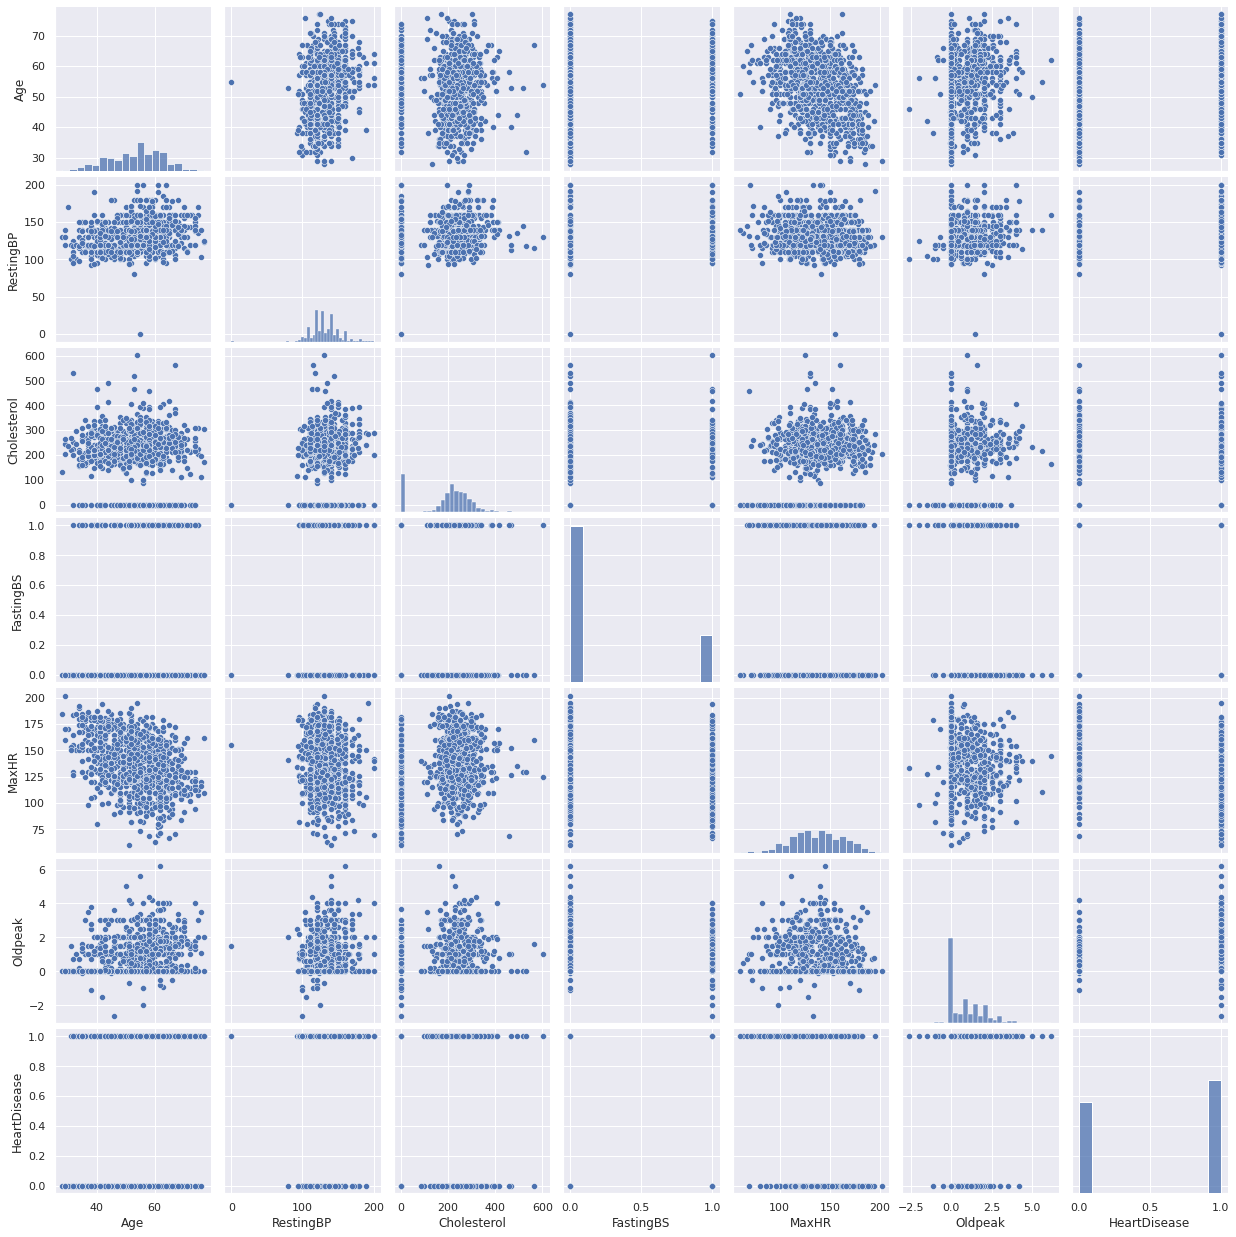

In [23]:
sns.pairplot(data[numerical_columns])

### Conclusions

From the above analysis we can see that most of our categorical features has some relationship with our Target Variable. While the numerical features are less more important but nevertheless we are going to include both to our model. and also most of the males in our Dataset have Heart Disease.

## Models Creationg and Selection

In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

### Data Preprocessing

In [26]:
ohd = OneHotEncoder()
scaler = StandardScaler()
cols = make_column_transformer((ohd, categorical_columns), (scaler, numerical_columns[:-1]))

X = cols.fit_transform(data)
y = data['HeartDisease']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Base Model (Logistic Regression)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model_0 = LogisticRegression()
model_0.fit(X_train, y_train)
accuracy_0 = model_0.score(X_test, y_test)
y_pred = model_0.predict(X_test)
print(f"Accuracy: {accuracy_0:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



### K-Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
ks = range(5, 20)
leaf_size = range(10, 50)
param_grid = {
    'leaf_size': leaf_size,
    'n_neighbors': ks
}
grid = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, cv=10)
grid.fit(X_train, y_train)

model_1 = grid.best_estimator_
y_pred = model_1.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred)

print(f"Best Score: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

print(f"\nAccuracy: {accuracy_1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Score: 0.864423076923077
Best Params: {'n_neighbors': 19, 'leaf_size': 18}

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

estimators = range(10, 100, 10)
splits = [5, 10, 15, 20]

parameters = {
    'n_estimators': estimators,
    'min_samples_split': splits
}

grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters, cv=10)
grid.fit(X_train, y_train)

model_2 = grid.best_estimator_
y_pred = model_2.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred)

print(f"Best Score: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

print(f"\nAccuracy: {accuracy_2:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Score: 0.8660336538461539
Best Params: {'n_estimators': 90, 'min_samples_split': 5}

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       112
           1       0.92      0.91      0.91       164

    accuracy                           0.90       276
   macro avg       0.89      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### SVM

In [35]:
from sklearn.svm import SVC

parameters = {
    'C': [10, 15, 20, 50, 100],
    'gamma': [0.1, 0.01, 0.004, 1]
}
grid = GridSearchCV(SVC(), param_grid=parameters, cv=10)
grid.fit(X_train, y_train)

model_1 = grid.best_estimator_
y_pred = model_1.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred)

print(f"Best Score: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

print(f"\nAccuracy: {accuracy_1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Score: 0.8644711538461539
Best Params: {'C': 10, 'gamma': 0.01}

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



### Final Thoughts

As seen from the previous models training and Hyper Parameters Tunning `RandomForestClassifier` with 80 *estimators* and 10 *min_sample_splits* is the overall winner with 91% accuracy on The Test Set. 